# A Smarter Implementation

We should be able to search smarter.

In [87]:
import random
from typing import Generator
from math import comb, log, floor


def find_min_value_given_probability(N, n, target_probability):
    # Calculate the total combinations for the sample
    total_combinations = comb(N, n)
    
    # Iterate to find the m that matches the target probability
    m = 1
    while m < N - n + 1:
        current_combination = comb(N - m, n)
        probability = current_combination / total_combinations

        print(f'target_probability = {target_probability}')
        print(f'probability = {probability}')
        print(f'm = {m}')
        
        if probability <= target_probability:
            return m

        # FIXME: This might go too far.
        #  The final m is > current m and <= the m below.
        m = m + floor(log(target_probability) / log(probability))
        print(f'next_m = {m}')
    
    return m


def generate_unique_random_numbers(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    if max_num - min_num + 1 < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")

    n = batch_size

    while n > 0:
        N = max_num - min_num + 1
        random_probability = random.random()
        print(f'min_num = {min_num}')
        print(f'max_num = {max_num}')
        m = find_min_value_given_probability(N, n, random_probability)
        number = min_num + m - 1
        print(f'number = {number}')
        print()
        min_num = number + 1
        n -= 1
        yield number

In [91]:
list(generate_unique_random_numbers(1, 10, 3))

min_num = 1
max_num = 10
target_probability = 0.6725479427595327
probability = 0.7
m = 1
next_m = 2
target_probability = 0.6725479427595327
probability = 0.4666666666666667
m = 2
number = 2

min_num = 3
max_num = 10
target_probability = 0.09546569265422766
probability = 0.75
m = 1
next_m = 9
number = 11

min_num = 12
max_num = 10


ValueError: n must be a non-negative integer

## Distribution

The distribution of this approach is even.

Chi-Square Statistic: 1648.3133333333333
P-Value: 0.0


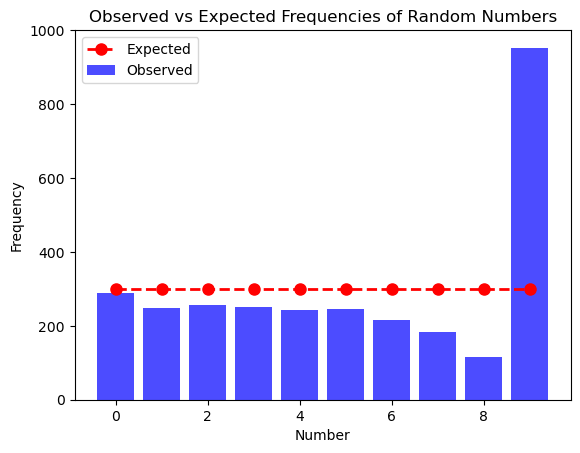

In [86]:
import run

run.plot(generate_unique_random_numbers, 0, 9, 3, 1000)

## Execution Time

The execution time here is terrible. Can we do better?

In [4]:
import plot

#df = run.measure_time(lambda range_size, batch_size: generate_unique_random_numbers(1, range_size, batch_size))
#plot.execution_time(df)

## Memory Usage

The memory usage is constant.